In [1]:
import jax
import jax.numpy as jnp
from phoenix.actions import sample_df_potential, estimate_envelope_max

/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:11: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  @jaxtyped
/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:39: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite ty

In [2]:
key = jax.random.PRNGKey(42)

# DF parameters: either nested "thin"/"thick" or flat — your f_total_disc_from_params accepts both.
params = {
    # Choose potential either via short name + scalars…
    "Phi_name": "MN",
    "M": 1e11, "a": 6.5, "b": 0.26,
    # …or supply directly:
    # "Phi_xyz": miyamoto_nagai_potential,
    # "theta": (1.0, 6.0, 0.3),

    "thin": {
        "R0": 8.0, "Rd": 2.6, "Sigma0": 1000.0,
        "RsigR": 7.0, "RsigZ": 7.0,
        "sigmaR0_R0": 35.0, "sigmaz0_R0": 20.0,
        "L0": 1500.0,
        "Rinit_for_Rc": 8.0,
    },
    "thick": {
        "R0": 8.0, "Rd": 2.0, "Sigma0": 300.0,
        "RsigR": 7.0, "RsigZ": 7.0,
        "sigmaR0_R0": 55.0, "sigmaz0_R0": 40.0,
        "L0": 1500.0,
        "Rinit_for_Rc": 8.0,
    },
    "f_thin": 0.7, "f_thick": 0.3,
}

# Robust envelope
env = estimate_envelope_max(key, params, n_probe=300_000)

# Draw weighted candidates
weighted, w, candidates, df_vals = sample_df_potential(
    key, params,
    n_candidates=100_000,
    envelope_max=4e-8,
    tau=0.02,                 # softer/harder step
    JR_max=200.0, Jz_max=50.0, Lz_max=4000.0
)


df stats: 0.0 3.454323760365696e-08
ratio max (df/envelope): 0.8635809421539307
weights stats: 1.9299788755352004e-22 1.0 0.013864112086594105
envelope_max: 4e-08


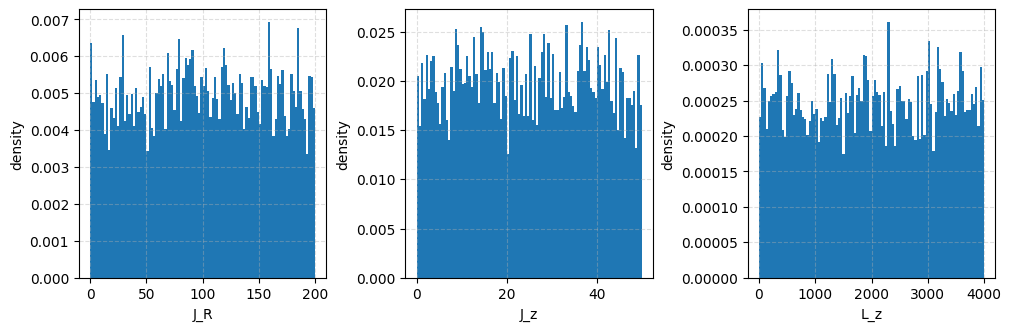

(<Figure size 1000x320 with 3 Axes>,
 array([<Axes: xlabel='J_R', ylabel='density'>,
        <Axes: xlabel='J_z', ylabel='density'>,
        <Axes: xlabel='L_z', ylabel='density'>], dtype=object))

In [3]:
from phoenix.actions import plot_action_histograms
plot_action_histograms(candidates, weights=w, bins=100)